In [291]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [292]:
#Create the dataframes for each dataset
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [293]:
#Data Cleaning: removing the Port James entry duplicates from the dataframes
city_data = city_data[city_data['city'] != "Port James"]
city_data.set_index("city", inplace=True)
city_data.sort_index(inplace=True)
ride_data = ride_data[ride_data["city"] != "Port James"]
ride_data.set_index("city", inplace=True)
ride_data.sort_index(inplace=True)

In [294]:
#Merging the dataframes
pyber_df = pd.merge(city_data, ride_data, how="left", left_index=True, right_index=True)
pyber_df.head()

,driver_count,type,date,fare,ride_id
city,,,,,
Alvarezhaven,21,Urban,2016-04-25 08:50:08,31.82,7948246793429
Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355
Alvarezhaven,21,Urban,2016-01-25 06:02:25,5.16,2233026076010
Alvarezhaven,21,Urban,2016-09-23 21:51:59,17.67,3829336915201
Alvarezhaven,21,Urban,2016-01-28 23:53:55,9.87,2747592323442


In [295]:
#Calculating Average Fare per city
avg_fare = pyber_df.groupby("city")["fare"].mean()
#Calculating Total Rides per city
total_rides = pyber_df.groupby("city")["ride_id"].count()
#Listing the Total Drivers count per city
total_drivers = city_data["driver_count"]
#Listing the city type for each city
city_type = city_data["type"]

In [296]:
#Creating a Dataframe with avg_fare, total_rides, total_drivers, and type
df = pd.DataFrame({"Avg. Fare": avg_fare})
df["Total Rides"] = total_rides 
df["Total Drivers"] = total_drivers
df["City Type"] = city_type
df.head()

,Avg. Fare,Total Rides,Total Drivers,City Type
city,,,,
Alvarezhaven,23.928710,31,21,Urban
Alyssaberg,20.609615,26,67,Urban
Anitamouth,37.315556,9,16,Suburban
Antoniomouth,23.625000,22,21,Urban
Aprilchester,21.981579,19,49,Urban


In [363]:
#Creating the Bubble Plot for each city type
plt.subplot(facecolor='ivory')

plt.scatter(df[df["City Type"] == "Urban"]["Total Rides"], df[df["City Type"] == "Urban"]["Avg. Fare"], 
            s = df[df["City Type"] == "Urban"]["Total Drivers"] *2, alpha = .65, color = "lightcoral", label = "Urban")
plt.scatter(df[df["City Type"] == "Suburban"]["Total Rides"], df[df["City Type"] == "Suburban"]["Avg. Fare"], 
            s = df[df["City Type"] == "Suburban"]["Total Drivers"] *2, alpha = .65, color = "lightskyblue", label = "Suburban")
plt.scatter(df[df["City Type"] == "Rural"]["Total Rides"], df[df["City Type"] == "Rural"]["Avg. Fare"], 
            s = df[df["City Type"] == "Rural"]["Total Drivers"]*2, alpha = .65, color = "gold", label = "Rural")
# Create legends and set legend key size
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Create Lables and title
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing data 2016")
#Changing the axis
plt.xlim(0,40)
plt.ylim(15,55)
# Create Grid
plt.grid()


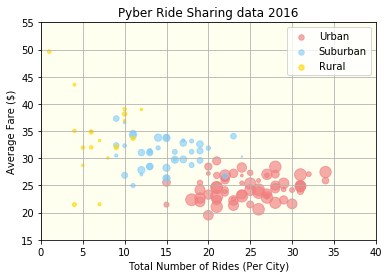

In [364]:
plt.show()

In [241]:
#Create a list of Percentage of Total Fare by City Type
per_total_fare = []
total_fare_bytype = pyber_df.groupby("type")["fare"].sum()
total_sum = total_fare_bytype.sum()
per_total_fare.append(total_fare_bytype["Urban"]/total_sum)
per_total_fare.append(total_fare_bytype["Suburban"]/total_su)
per_total_fare.append(total_fare_bytype["Rural"]/total_sum)

[0.63988664213240498, 0.29217702986421018, 0.067936328003384769]

In [274]:
#Setting up Pie Chart
labels = ["Urban" , "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)
#Create Pie Chart
plt.pie(per_total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-130)
plt.axis("equal")
#Assign Title
plt.title("% of Total Fares by City Type")

Text(0.5,1,'% of Total Fares by City Type')

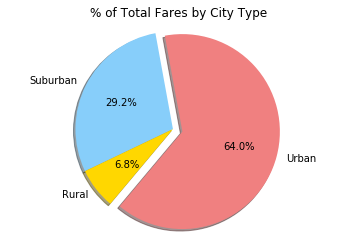

In [275]:
plt.show()

In [276]:
#Create a list of Percentage of Total Rides by City Type
per_total_ride = []
total_ride_bytype = df.groupby("City Type")["Total Rides"].sum()
total_rsum = total_ride_bytype.sum()
per_total_ride.append(total_ride_bytype["Urban"]/total_rsum)
per_total_ride.append(total_ride_bytype["Suburban"]/total_rsum)
per_total_ride.append(total_ride_bytype["Rural"]/total_rsum)

City Type
Rural        125
Suburban     593
Urban       1625
Name: Total Rides, dtype: int64

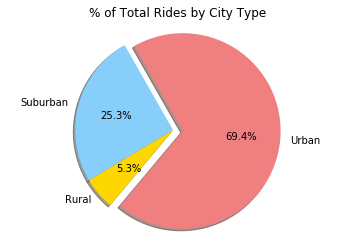

In [279]:
#Setting up Pie Chart
labels = ["Urban" , "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)
#Create Pie Chart
plt.pie(per_total_ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-130)
plt.axis("equal")
#Assign Title
plt.title("% of Total Rides by City Type")

plt.show()

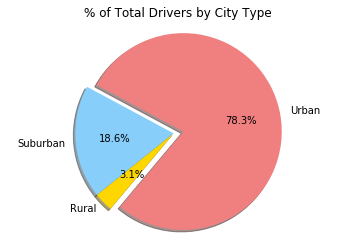

In [283]:
#Setting up Pie Chart
labels = ["Urban" , "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)
#Create Pie Chart
plt.pie(per_total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-130)
plt.axis("equal")
#Assign Title
plt.title("% of Total Drivers by City Type")

plt.show()